**This file is for exploring the role of graph structure when using different graph losses**
\
\
The intuition is that when hyperparameter for graph loss is extremely large, i.e. the graph information matters a lot more than the vector information, the matrix $W$ is expected to relect the role of a node in the motif.

In [4]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
from util import *
from loss import *
from Estimator import *
from cluster import *
import matplotlib.pyplot as plt

### Star graph

In [32]:
G = nx.star_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

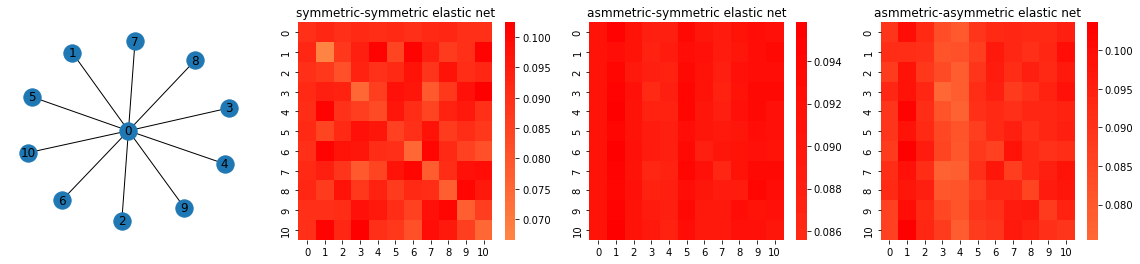

In [6]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

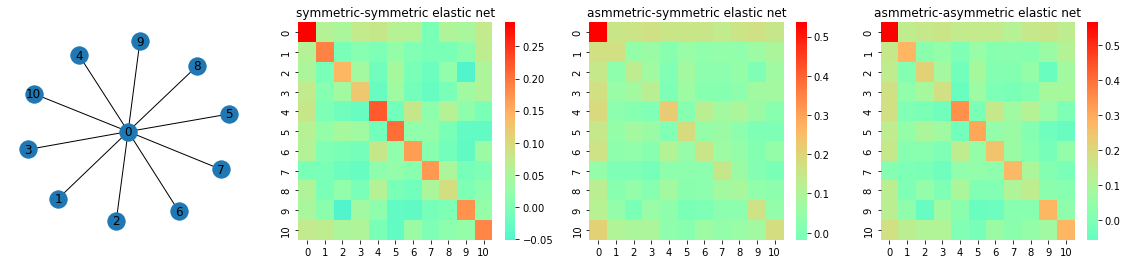

In [52]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=100)
ax0 = f.add_subplot(1, 4, 2)
sse.heatplot()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=100)
ax1 = f.add_subplot(1, 4, 3)
ase.heatplot()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=100)
ax2 = f.add_subplot(1, 4, 4)
aae.heatplot()
ax2.set_title('asmmetric-asymmetric elastic net')

<AxesSubplot:>

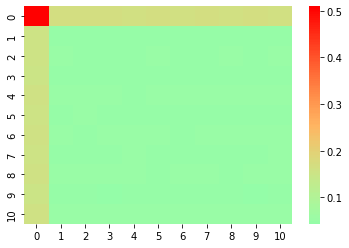

In [48]:
sb.heatmap((ase.W.value), cmap='rainbow', center=0)

In [47]:
symscaling(ase.W.value)

array([[0.08442383, 0.09362734, 0.09187811, 0.09357537, 0.08955718,
        0.0919805 , 0.08926509, 0.09112655, 0.08893763, 0.09689464,
        0.08876904],
       [0.08716641, 0.09082636, 0.09372637, 0.09255416, 0.09029381,
        0.09115621, 0.08942586, 0.09060078, 0.08985335, 0.09461905,
        0.08977351],
       [0.08701999, 0.09493058, 0.08587388, 0.09317978, 0.089722  ,
        0.09327874, 0.08821161, 0.09119327, 0.09088343, 0.09548447,
        0.09021873],
       [0.08700788, 0.09232128, 0.09182406, 0.09101864, 0.09000089,
        0.09267779, 0.09014863, 0.09137311, 0.09144056, 0.09228049,
        0.08990251],
       [0.0866146 , 0.09319514, 0.09142659, 0.09307814, 0.08762129,
        0.09180666, 0.08918651, 0.09235334, 0.09052279, 0.09522966,
        0.08896269],
       [0.08669669, 0.09212679, 0.0930243 , 0.09382335, 0.08986546,
        0.08959084, 0.09042785, 0.09127189, 0.08798149, 0.09613882,
        0.08904915],
       [0.08666427, 0.09261573, 0.09023716, 0.09349511, 0.

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

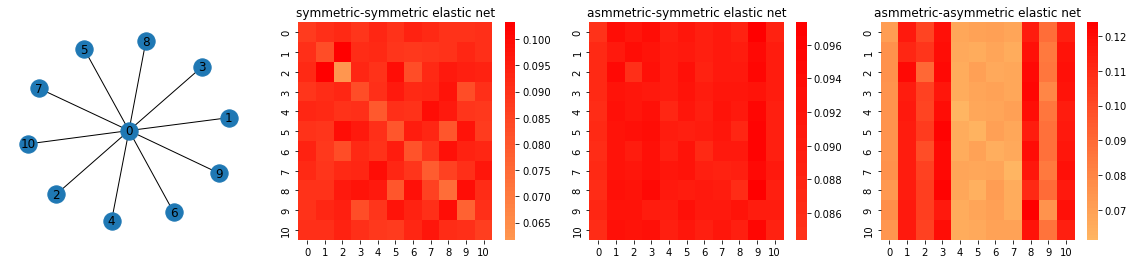

In [33]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Tree graph

In [8]:
G = nx.balanced_tree(3,2)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

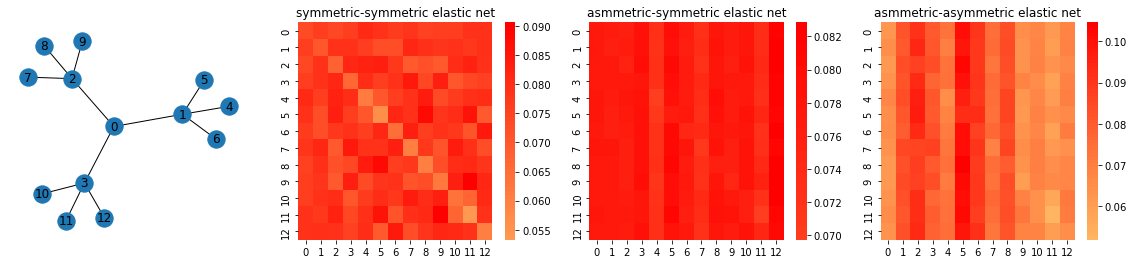

In [9]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

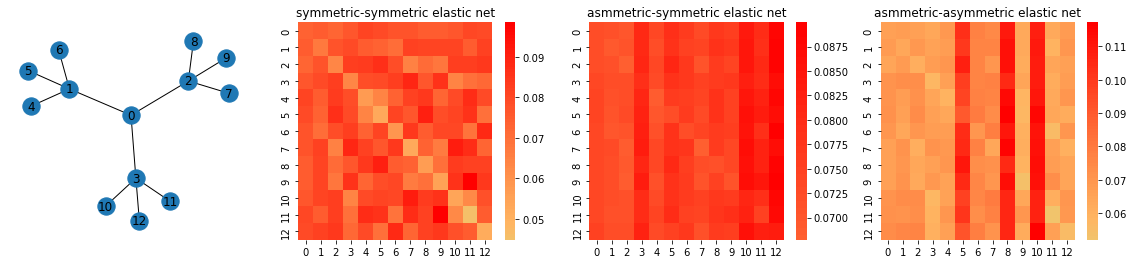

In [10]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Barbell Graph

In [11]:
G = nx.barbell_graph(4,3)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

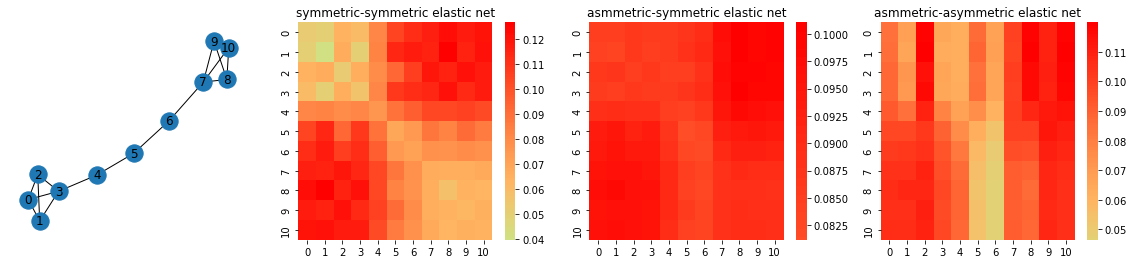

In [12]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

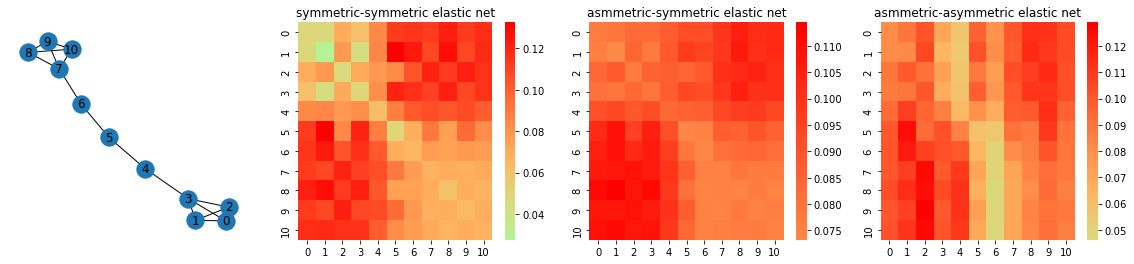

In [13]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Complete graph

In [14]:
G = nx.complete_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

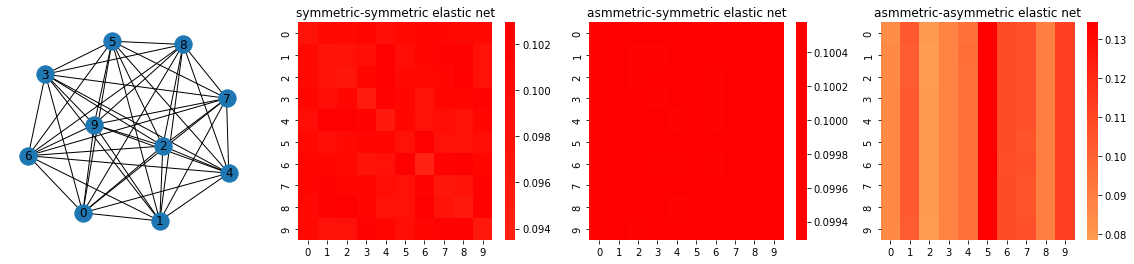

In [15]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

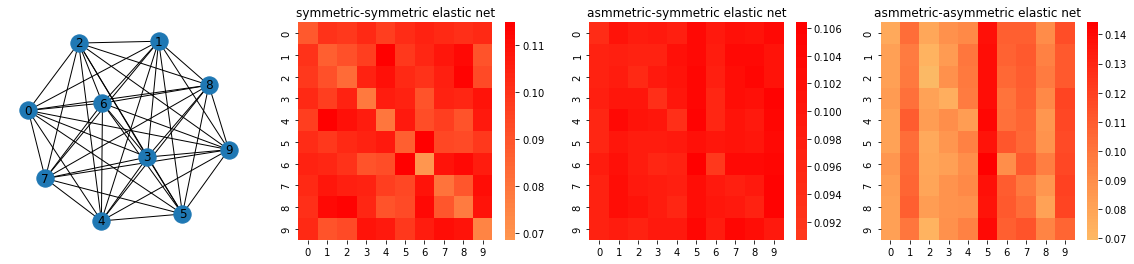

In [16]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Cycle graph

In [17]:
G = nx.cycle_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

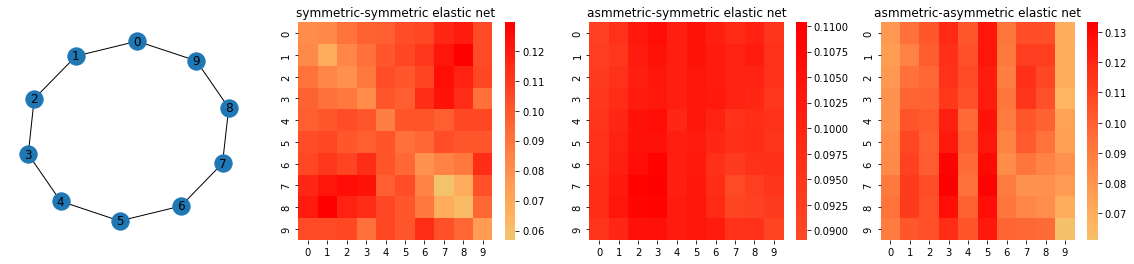

In [18]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

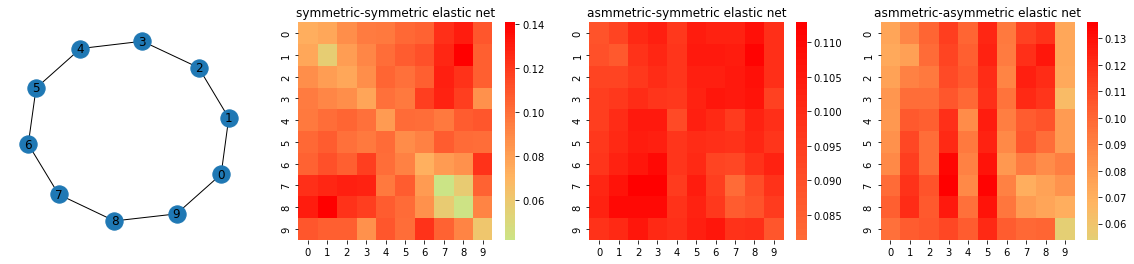

In [19]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Path graph

In [20]:
G = nx.path_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

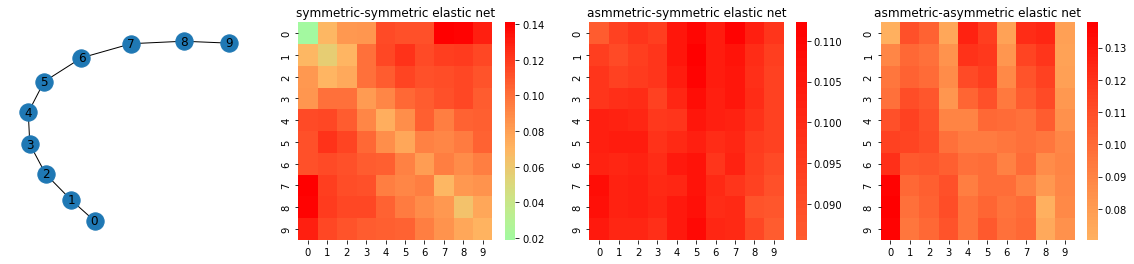

In [21]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

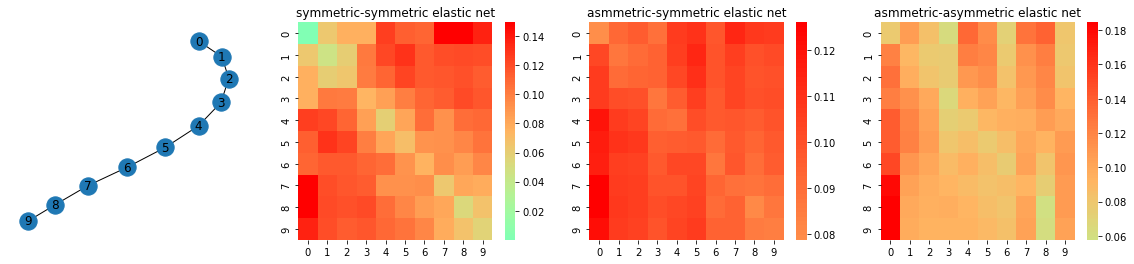

In [22]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Wheel graph

In [23]:
G = nx.wheel_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

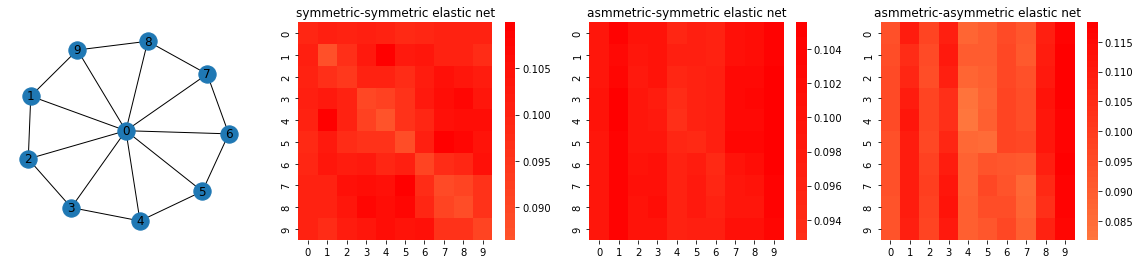

In [24]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

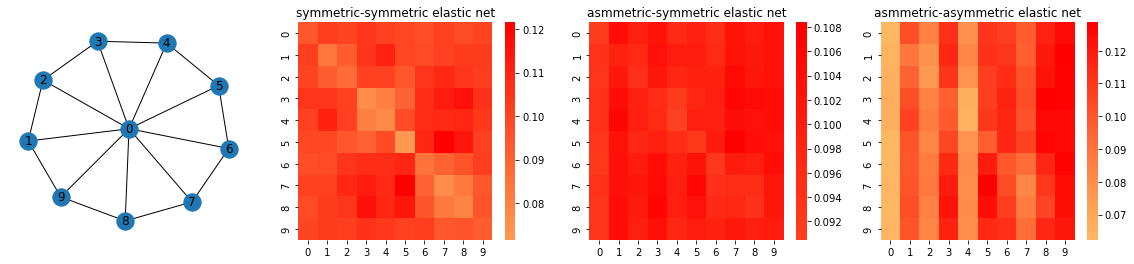

In [25]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Diamond graph

In [26]:
G = nx.diamond_graph()
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

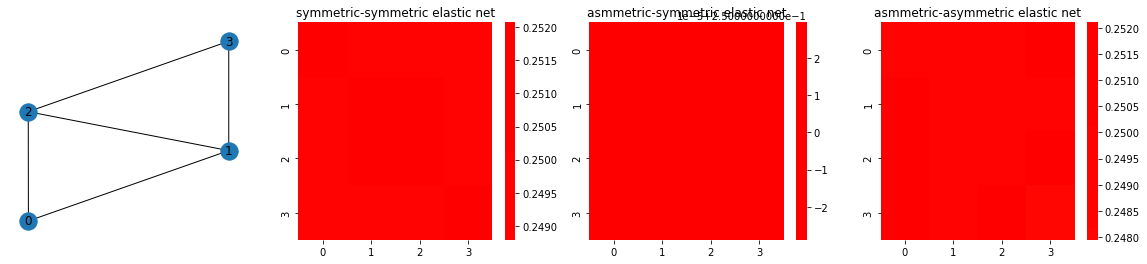

In [27]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

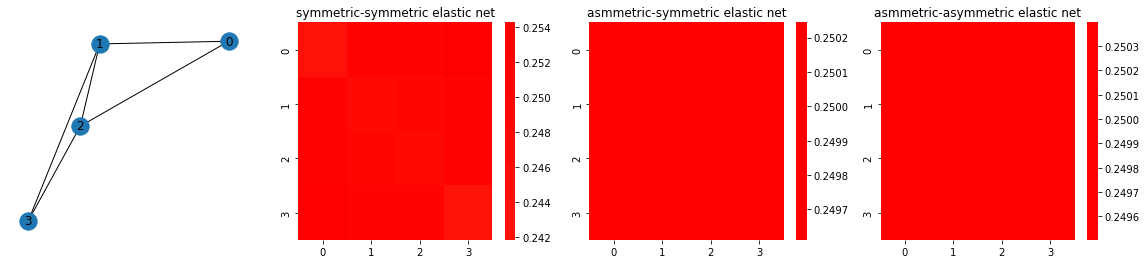

In [28]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### House graph

In [29]:
G = nx.house_graph()
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

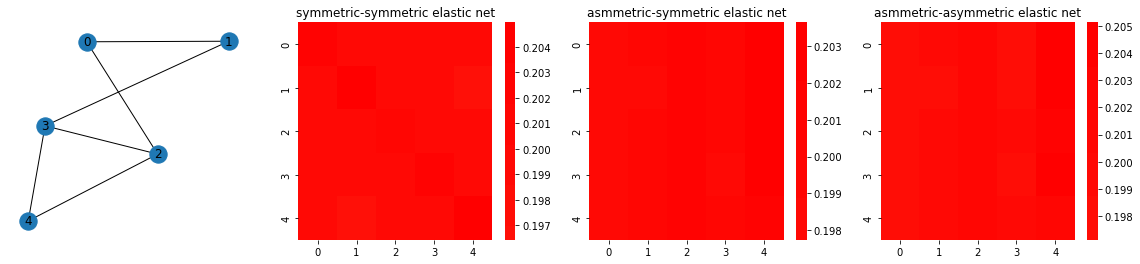

In [30]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

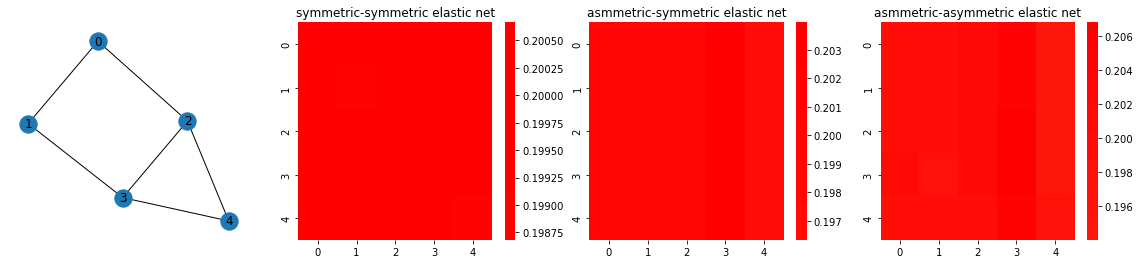

In [31]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')